# Kaggle team name: AI papi!

| Team Member                | StudentID  |
|----------------------------|------------|
| Per-Christian Færøvik Grieg | StudentID  |
| Syver Verlo Nes            | StudentID  |
| Henning Olweus             | 527221  |

- **Adde dependencies, i tilfelle koden ikke kjører?**
- **pip-install dependencies det som trengs for å kjøre?**
- **Activate viritual enviroment?**

# Possible deductable points (tags)
In order to make it easier to cross off that the ceckpoints for deducted points have been included in the notebook, we have left **tags** where this has been done. Using the search function you can search for the tag in the table below to find places in the notebook where the following deduction point has been included. The same tag can be found more than once in the notebook, as some of the anlaysis can have been done in the EDA analysis, and some in when testing models with different preprocessing. 


| Tag | Possible Deduction Checkpoints |
|-----|--------------------------------|
|SDK123    | Search domain knowledge |
|Intu123     | Check if the data is intuitive |
|UG123     | Understand how the data was generated |
|ExFeat123     | Explore individual features |
|ExPGFeat123     | Explore pairs and groups of features |
|ClFeat123     | Clean up features |
|Pred123     | Only one type of predictor is used (-3). |
|FeatEng123     | no feature engineering (-3). |
|Modinter123     | no model interpretation (-3).  |


# **Structure of long notebook**
---
## **1. EDA**
## **2. Preprocessing**
## **3. Simple ML models**
## **4. AutoML models**
---



# **1. Exploratory Data Analysis (EDA)**
---

### Search for domain knowledge  (SDK123)
Before diving deeper into the data and ML models, we would like to understand what is the main driver of solar production. This can help us better understand the data, the individual features and the importance of them. This we can do by reading about what features or weather conditions has an effect on solar production. We of course have the obvious ones like sunlight  and clear sky, but diving deeper into other conditions can be helpfull when diving into our EDA. 


After scanning the web for information on the impact our different features has on solar power production and the prediction of these values, we decided to structure this in the table below. The "low", "moderate" and "high" columns is our hypothesis on the impact certain features will have on predicting solar porduction, also reflecting their impact on production. 

| Feature Name                         | Low       | Moderate  | High      | Reasoning |
|--------------------------------------|-----------|-----------|-----------|-----------|
| `absolute_humidity_2m:gm3`           |           | x         |           | Can have an effect on cloud formation and therefore an inderectly effect on solar irradiance. |
| `air_density_2m:kgm3`                |           | x         |           | Could maybe or slightly influence the efficiency of solar panels. |
| `ceiling_height_agl:m`               |           | x         |           | Can affect sunlight penetration. |
| `clear_sky_energy_1h:J`              |           |           | x         | Directly related to solar energy under clear sky conditions. |
| `clear_sky_rad:W`                    |           |           | x         | Important as it represents the potential radiation under clear sky |
| `cloud_base_agl:m`                   |           | x         |           | Potenionally effects the solar radiation reaching the ground. |
| `dew_or_rime:idx`                    |           | x         |           | Can indicate moisture levels, which in turn may correlate with cloud cover. |
| `dew_point_2m:K`                     |           | x         |           | Can from our understanding be related to cloud formation, which in turn can block sunlight. |
| `diffuse_rad:W`                      |           | x         |           | Diffuse radiation can still be absorbed by the solar panels, affecting our predictions. |
| `diffuse_rad_1h:J`                   |           | x         |           | Same as row above, but could maybe tell us more because it gives us it over time. |
| `direct_rad:W`                       |           |           | x         | We see this as one of the most important features for solar energy production, and it therfore affects our predictions significantly. |
| `direct_rad_1h:J`                    |           |           | x         | Same as above . |
| `effective_cloud_cover:p`            |           |           | x         | Important as it directly impacts the amount of sunlight reaching the solar panels. |
| `elevation:m`                        |           | x         |           | Could have some infuence, as it can tell something avout weather patterns and sunlight exposure. |
| `fresh_snow_12h:cm`                  |          | x          |           |Longer duration of snowfall can potentionally have a strong effect on solar production, hence our predictions. |
| `fresh_snow_1h:cm`                   | x         |           |           | Short-duration snow can affect predictions but less so than all-day events. |
| `fresh_snow_24h:cm`                  |          | x          |           | Longer duration of snowfall can potentionally have a strong effect on solar production, hence our predictions. |
| `fresh_snow_3h:cm`                   | x         |           |           | Short-duration snow can affect predictions but less so than all-day events. |
| `fresh_snow_6h:cm`                   |          | x          |           | Longer duration of snowfall can potentionally have a strong effect on solar production, hence our predictions. |
| `is_day:idx`                         |           |           | x         | Is day gives is important as it says something about the potential for solar production, foundational for our prediction. |
| `is_in_shadow:idx`                   |          | x       |           | Indicates potential shading which is important for accurate predictions. |
| `msl_pressure:hPa`                   | x          |          |           | Pressure can say something about weather patterns that could affect solar irradiance. |
| `precip_5min:mm`                     |          |x           |           | As we see it, precipitation can both clean or cover the solar panels, impacting short-term predictions. |
| `precip_type_5min:idx`               |          |x           |           | Same as above. |
| `pressure_100m:hPa`                  |           | x         |           | Pressure at altitude can indicate weather trends, indirectly affecting predictions. |
| `pressure_50m:hPa`                   |           | x         |           | Can tell us something about the weather and as well as weather to comeffects weather trend analysis for prediction. |
| `prob_rime:p`                        | x         |           |           | Rime could affect surface conditions of panels, impacting predictions

When looking at if the data is intuitive, we have use what we have learned in our search for domain knowledge.
- Does Solar production should correlate positively with irradiance?
- Production should typically be higher in summer months (assuming the location is in the Northern Hemisphere) due to longer daylight hours --> seasonality?
- Bad weather should usually show a drop in production.

### Understand how the data was generated?

### Explore individual features 

Maybe plot the most important features from domain knowledge analysis, together with seasonal decomp

### Explore pairs and groups of features 


# **2. Simple ML models**

---

## **XGBoost**
- **What we tried:**
    1. Different train/validation splits
        - Helped: Yes
        - Optimal: 12.5% of last data.
    2. MinMax scaler.
        - Helped: No
    3. Bayesian Optimization for finding best hyperparameters:
        - Helped: No
    4. Early stopping to prevent overfitting:
        - Helped: Yes
    5. Retraining on the entire dataset after finding right hyperparams and epochs.
        - Helped: Yes
- **Best MAE Kaggle:**
    - 159.7


In [ ]:
#!pip install xgboost

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from hyperopt import STATUS_OK, hp, fmin, tpe, Trials, space_eval
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from baeysianOptimization import BayesianOptimization

In [ ]:
x_train = pd.read_csv('cleaned_and_combined_data/x_train_combined.csv')
y_train = pd.read_csv('cleaned_and_combined_data/y_train_combined.csv')
x_test = pd.read_csv('cleaned_and_combined_data/x_test_combined.csv')

### 1. Try different validation splits
- Optimal = 12.5% of data

In [ ]:
# Determine the split index
split_index = int(0.875 * len(x_train))

# Split the data into training and validation sets
x_train_df = x_train[:split_index]
y_train_df = y_train[:split_index]
x_valid_df = x_train[split_index:]
y_valid_df = y_train[split_index:]
# Drop the specified columns
columns_to_drop=(['hour_sin','hour_cos','month_sin','month_cos'])
x_train_df.drop(columns=columns_to_drop, inplace=True)
x_valid_df.drop(columns=columns_to_drop, inplace=True)
x_test.drop(columns=columns_to_drop, inplace=True)

# For cross-validation and training after validation
combined_xdf = pd.concat([x_train_df, x_valid_df], axis=0).reset_index(drop=True)
combined_ydf = pd.concat([y_train_df, y_valid_df], axis=0).reset_index(drop=True)



,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms,forecast_year,forecast_month,forecast_day,forecast_hour,day_of_year,direct_rad_3h_roll_avg,diffuse_rad_3h_roll_avg,direct_rad_6h_roll_avg,diffuse_rad_6h_roll_avg,direct_rad_x_sun_elevation,location_A,location_B,location_C,observed,estimated
0,4.325,1.28675,912.7000,0.0,0.000,1061.5500,0.0,271.65002,0.000,0.00,0.00,0.0,74.950,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.675,0.0,0.0,1000.550,1006.800,0.0,0.0,80.275,1013.100,NaN,0.0,0.0,0.0,0.0,16.02650,-10.5410,0.0,273.80000,74.950,29907.500,3.950,2.100,3.35,0.0,2023,5,1,0,121,0.000000,0.000000,0.000,0.00000,-0.00000,1,0,0,0,1
1,4.275,1.28600,1482.1000,0.0,0.000,1075.1001,0.0,271.45000,0.000,0.00,0.00,0.0,77.475,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.150,0.0,0.0,1000.050,1006.300,0.0,0.0,79.825,1012.600,NaN,0.0,0.0,0.0,0.0,30.49725,-7.8945,0.0,273.80000,77.475,29519.074,3.825,1.925,3.30,0.0,2023,5,1,1,121,0.000000,0.000000,0.000,0.00000,-0.00000,1,0,0,0,1
2,4.150,1.28375,1791.3000,0.0,0.000,1200.4000,0.0,271.05000,0.000,0.00,0.00,0.0,88.100,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1012.675,0.0,0.0,999.500,1005.800,0.0,0.0,78.000,1012.050,NaN,0.0,0.0,0.0,0.0,44.51725,-3.8155,0.0,273.84998,88.100,31009.125,3.650,1.750,3.20,0.0,2023,5,1,2,121,0.000000,0.000000,0.000,0.00000,-0.00000,1,0,0,0,1
3,4.025,1.28200,2312.8750,40497.7,11.675,1179.8500,0.0,270.65000,9.375,67380.91,2.10,15061.4,68.600,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1012.175,0.0,0.0,998.975,1005.225,0.0,0.0,75.625,1011.525,NaN,0.0,0.0,0.0,0.0,58.08300,1.4125,0.0,273.90000,68.600,34552.500,3.500,1.450,3.15,0.0,2023,5,1,3,121,0.700000,3.125000,0.525,2.34375,2.96625,1,0,0,0,1
4,3.900,1.28100,2198.2998,566994.4,76.875,920.0500,0.0,270.37500,47.400,408838.80,25.45,198284.8,66.300,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1011.725,0.0,0.0,998.550,1004.750,0.0,0.0,74.225,1011.050,NaN,0.0,0.0,0.0,0.0,71.34100,7.4685,0.0,273.92500,66.300,35483.875,3.325,1.300,3.05,0.0,2023,5,1,4,121,9.183334,18.925001,5.510,11.35500,190.07333,1,0,0,0,1


### 2. Try MinMax Scaling
- Did not help

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# # Exclude boolean columns (location_A, location_B, location_C)
# columns_to_scale = x_train.columns.difference(['location_A', 'location_B', 'location_C'])

# scaler = MinMaxScaler()
# x_train[columns_to_scale] = scaler.fit_transform(x_train[columns_to_scale])
# x_test[columns_to_scale] = scaler.transform(x_test[columns_to_scale])


### 3. Try Bayesian Optimization to find optimal hyperparameters
- Did not help

In [ ]:
# Bayesian Optimization used for finding optimal hyperparams
class BayesianOptimization:
    def __init__(self, x_train, y_train, x_valid, y_valid, space):
        self.x_train = x_train
        self.y_train = y_train
        self.x_valid = x_valid
        self.y_valid = y_valid
        self.space = space
        self.trials = Trials()

    def objective(self, params):
        model = xgb.XGBRegressor(**params, early_stopping_rounds=50)
        model.fit(self.x_train, self.y_train, eval_set=[(self.x_valid, self.y_valid)], verbose=False)
        pred = model.predict(self.x_valid)
        mae = mean_absolute_error(self.y_valid, pred)
        return {'loss': mae, 'status': STATUS_OK}

    def optimize(self, n_evals=100):
        best = fmin(fn=self.objective,
                    space=self.space,
                    algo=tpe.suggest,
                    max_evals=n_evals,
                    trials=self.trials)
        return best

    def get_best_params(self):
        return space_eval(self.space, self.trials.argmin)

# The search space used for finding optimal hyperparams. 
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'max_depth': hp.choice('max_depth', range(1, 15, 1)),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'alpha': hp.loguniform('alpha', -5, 2),  # exponential distribution over [0.01, 7.4]
    'lambda': hp.loguniform('lambda', -5, 2), 
    'n_estimators': hp.choice('n_estimators', range(100, 1000, 50))
}

# # Create an instance of the optimizer
# optimizer = BayesianOptimization(x_train_df, y_train_df['pv_measurement'], x_valid_df, y_valid_df['pv_measurement'], space)

# # Optimize
# best_params = optimizer.optimize()

# optimizer.get_best_params()

### 4. Try early stopping with validation set
- Helped

In [ ]:
dtrain = xgb.DMatrix(x_train_df,label = y_train_df['pv_measurement'])
dval = xgb.DMatrix(x_valid_df,label = y_valid_df['pv_measurement'])
test = xgb.DMatrix(x_test)

In [ ]:
fixed_params = {
        'objective': 'reg:squarederror',
        'eval_metric': 'mae',
        'booster': 'gbtree'
}
variable_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 1,
}
#variable_params = best_params

all_params = {**fixed_params,**variable_params} 
#  Train the model
num_boost_round = 10000  # Maximum number of boosting rounds
early_stopping_rounds = 50  # Stop if validation score doesn't improve for 50 rounds

evals = [(dtrain, 'train'), (dval, 'eval')]
progress = {}


In [ ]:
bst = xgb.train(
    all_params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=evals,
    early_stopping_rounds=early_stopping_rounds,
    evals_result=progress
)

print("Best MAE: {:.2f} with {} rounds".format(
         bst.best_score,
         bst.best_iteration+1))


[0]	train-mae:430.21176	eval-mae:430.81288
[1]	train-mae:410.44635	eval-mae:411.03265
[2]	train-mae:391.73151	eval-mae:392.37869
[3]	train-mae:374.12450	eval-mae:374.75271
[4]	train-mae:357.58574	eval-mae:358.28632
[5]	train-mae:342.00300	eval-mae:342.72109
[6]	train-mae:327.33480	eval-mae:328.08792
[7]	train-mae:313.63025	eval-mae:314.43627
[8]	train-mae:300.73169	eval-mae:301.66094
[9]	train-mae:288.57162	eval-mae:289.61382


[10]	train-mae:277.16297	eval-mae:278.30952
[11]	train-mae:266.49147	eval-mae:267.64566
[12]	train-mae:256.46329	eval-mae:257.69400
[13]	train-mae:246.98128	eval-mae:248.32944
[14]	train-mae:238.07724	eval-mae:239.51394
[15]	train-mae:229.73398	eval-mae:231.32974
[16]	train-mae:221.88423	eval-mae:223.63578
[17]	train-mae:214.46645	eval-mae:216.38419
[18]	train-mae:207.48662	eval-mae:209.49479
[19]	train-mae:200.90722	eval-mae:203.06514
[20]	train-mae:194.74904	eval-mae:196.98856
[21]	train-mae:188.93914	eval-mae:191.32253
[22]	train-mae:183.49187	eval-mae:185.94101
[23]	train-mae:178.31923	eval-mae:180.87316
[24]	train-mae:173.45151	eval-mae:176.15235
[25]	train-mae:168.89981	eval-mae:171.79050
[26]	train-mae:164.58590	eval-mae:167.60887
[27]	train-mae:160.57217	eval-mae:163.66078
[28]	train-mae:156.72819	eval-mae:159.93829
[29]	train-mae:153.11405	eval-mae:156.42346
[30]	train-mae:149.65997	eval-mae:153.07246
[31]	train-mae:146.43122	eval-mae:149.96321
[32]	train-mae:143.37314	eval-ma

### 5. Retrain on the entire dataset with optimal stopping round and hyperparams

In [ ]:
# Create a DMatrix for the whole dataset
dtrain_whole = xgb.DMatrix(combined_xdf,label = combined_ydf['pv_measurement'])
# Using the best iteration from previous training
best_iteration = bst.best_iteration + 1
# Retrain the model on the entire dataset
bst_whole = xgb.train(
    all_params,
    dtrain_whole,
    num_boost_round=best_iteration
)

In [ ]:
predictions = bst_whole.predict(test)
predictions

array([-1.5106149 , -0.6375855 , -0.41436076, ...,  9.555201  ,
        2.2275333 , -1.4605165 ], dtype=float32)

In [ ]:
sample_submission = pd.read_csv('sample_submission.csv')

# Convert the numpy array to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['prediction'])

# Convert all negative predictions to 0
predictions_df.loc[predictions_df['prediction'] < 0, 'prediction'] = 0

# Join the 'id' column from sample_submission with the predictions
sample_submission['prediction'] = predictions_df['prediction']

# Save to CSV
sample_submission.to_csv('xgboost.csv', index=False)
predictions_df

,prediction
0,0.000000
1,0.000000
2,0.000000
3,79.418022
4,352.832825
...,...
2155,48.357288
2156,23.512861
2157,9.555201
2158,2.227533


## **LightGBM**
- **What we tried:**
    1. Dropping different columns
        - Helped: Yes
        - Optimal: Drop cyclical features
    2. Different validation/train splits
        - Helped: Yes
        - Optimal: 12.5% of data
    3. Different Hyperparams
        - Helped: Yes
        - Optimal: See code
- **Best Kaggle score:**
    - 160.35

In [ ]:
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
x_train_a = pd.read_csv('cleaned_data/A/x_train_a.csv')
y_train_a = pd.read_csv('cleaned_data/A/train_a.csv')
x_test_a = pd.read_csv('cleaned_data/A/x_test_a.csv')

x_train_b = pd.read_csv('cleaned_data/B/x_train_b.csv')
y_train_b = pd.read_csv('cleaned_data/B/train_b.csv')
x_test_b = pd.read_csv('cleaned_data/B/x_test_b.csv')

x_train_c = pd.read_csv('cleaned_data/C/x_train_c.csv')
y_train_c = pd.read_csv('cleaned_data/C/train_c.csv')
x_test_c = pd.read_csv('cleaned_data/C/x_test_c.csv')

### 1. Trying to remove different columns
- Helped

In [ ]:
def prepare_dataset(x_train, y_train, x_test, merge_on, drop_columns):
    # Merge training data with the target variable
    x_train_combined = x_train.merge(y_train, left_on=merge_on[0], right_on=merge_on[1], how='left')
    # Create 'observed' column based on the 'calc_year' column's NaN values
    x_train_combined['observed'] = x_train_combined['calc_year'].isna().astype(int)
    # Drop specified columns from the training data
    train_data = x_train_combined.drop(drop_columns, axis=1).drop(['time'],axis = 1)
    # Repeat the process for test data
    x_test['observed'] = x_test['calc_year'].isna().astype(int)
    test_data = x_test.drop(drop_columns, axis=1).drop(['location'],axis=1)
    
    return train_data, test_data

# Define columns to drop from training and test datasets
drop_columns = ['hour_sin', 'hour_cos', 'month_sin', 'month_cos']

# Call the function with the relevant dataframes and columns
train_data_a, test_data_a = prepare_dataset(x_train_a, y_train_a, x_test_a, 
                                        ['date_forecast', 'time'], 
                                        drop_columns)
train_data_b, test_data_b = prepare_dataset(x_train_b, y_train_b, x_test_b, 
                                        ['date_forecast', 'time'], 
                                        drop_columns)
train_data_c, test_data_c = prepare_dataset(x_train_c, y_train_c, x_test_c, 
                                        ['date_forecast', 'time'], 
                                        drop_columns)



Necessary reformatting in order for LightGBM to process the data

In [ ]:
# LightGBM is unable to handle some characters
def clean_column_names(dataframe):
    # Replace any special JSON characters with an underscore (or remove them)
    clean_names = {col: col.replace(':', '_').replace(',', '_').replace('{', '_').replace('}', '_')
                   .replace('[', '_').replace(']', '_') for col in dataframe.columns}
    return dataframe.rename(columns=clean_names)

# Clean the column names for both train and test datasets
train_data_a = clean_column_names(train_data_a)
test_data_a = clean_column_names(test_data_a)
train_data_b = clean_column_names(train_data_b)
test_data_b = clean_column_names(test_data_b)
train_data_c = clean_column_names(train_data_c)
test_data_c = clean_column_names(test_data_c)

In [ ]:
# Split the data
X_a = train_data_a.drop('pv_measurement', axis=1)
y_a = train_data_a['pv_measurement']

X_b = train_data_b.drop('pv_measurement', axis=1)
y_b = train_data_b['pv_measurement']

X_c = train_data_c.drop('pv_measurement', axis=1)
y_c = train_data_c['pv_measurement']

### 2. Trying different train/val splits
- Helped

In [ ]:
# Found the optimal split ratio to be 0.875 or 12.5% of the dataset as validation
split_ratio = 0.875

def train_val_split(x,y,split_ratio):
    x_train = x[:int(len(x) * split_ratio)]
    x_val = x[int(len(x) * split_ratio):]
    y_train = y[:int(len(y) * split_ratio)]
    y_val = y[int(len(y) * split_ratio):]

    return x_train,x_val,y_train,y_val

X_train_a, X_val_a, y_train_a, y_val_a = train_val_split(X_a,y_a,split_ratio)
X_train_b, X_val_b, y_train_b, y_val_b = train_val_split(X_b,y_b,split_ratio)
X_train_c, X_val_c, y_train_c, y_val_c = train_val_split(X_c,y_c,split_ratio)


In [ ]:
# Transforming the datasets into LightGBM datasets
train_data_a = lgb.Dataset(X_train_a, label=y_train_a)
val_data_a = lgb.Dataset(X_val_a, label=y_val_a, reference=train_data_a)
train_data_b = lgb.Dataset(X_train_b, label=y_train_b)
val_data_b = lgb.Dataset(X_val_b, label=y_val_b, reference=train_data_b)
train_data_c = lgb.Dataset(X_train_c, label=y_train_c)
val_data_c = lgb.Dataset(X_val_c, label=y_val_c, reference=train_data_c)

### 3. Trying different hyperparameters
- Helped
- Optimal below

In [ ]:
# Define the parameters for the LightGBM model
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',  # Use MAE for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [ ]:
# Train the model
gbm_a = lgb.train(params,
                train_data_a,
                num_boost_round=10000,
                valid_sets=val_data_a,
                callbacks=[lgb.early_stopping(stopping_rounds=10)])

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[153]	valid_0's l1: 118.296


In [ ]:
gbm_b = lgb.train(params,
                train_data_b,
                num_boost_round=10000,
                valid_sets=val_data_b,
                callbacks=[lgb.early_stopping(stopping_rounds=10)])

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[149]	valid_0's l1: 16.8359


In [ ]:
gbm_c = lgb.train(params,
                train_data_c,
                num_boost_round=10000,
                valid_sets=val_data_c,
                callbacks=[lgb.early_stopping(stopping_rounds=10)])

Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[143]	valid_0's l1: 23.4166


In [ ]:
y_pred_a = gbm_a.predict(test_data_a, num_iteration=gbm_a.best_iteration)
formatted_predictions_a = [format(x, '.5f') for x in y_pred_a]
y_pred_b = gbm_b.predict(test_data_b, num_iteration=gbm_b.best_iteration)
formatted_predictions_b = [format(x, '.5f') for x in y_pred_b]
y_pred_c = gbm_c.predict(test_data_c, num_iteration=gbm_c.best_iteration)
formatted_predictions_c = [format(x, '.5f') for x in y_pred_c]

In [ ]:
# Concatinating the predictions
predictions = formatted_predictions_a + formatted_predictions_b + formatted_predictions_c

#Reading the sample submission to ensure the format is correct
sample_submission = pd.read_csv('sample_submission.csv')

# Convert the numpy array to a DataFrame
predictions_df = pd.DataFrame(predictions, columns=['prediction'])

# Convert all negative predictions to 0
predictions_df['prediction'] = predictions_df['prediction'].astype(float)
predictions_df.loc[predictions_df['prediction'] < 0, 'prediction'] = 0.0

# Join the 'id' column from sample_submission with the predictions
sample_submission['prediction'] = predictions_df['prediction']

# Save to CSV
sample_submission.to_csv('lightgbm.csv', index=False)
predictions_df

,prediction
0,3.11523
1,3.11523
2,3.11523
3,63.09452
4,400.21175
...,...
2155,38.99164
2156,12.44847
2157,0.37067
2158,0.20967


# **3. AutoML models**
---

## H2O


## **Autogluon hourly**
- **What we tried:**
    1. Validation split equal to half of estimated data
        - Helped: No
    2. Different params (holdout_frac, tuning_data, presets, num_stack_levels)
        - Helped: Yes
        - Optimal: see code
    3. Rows on fifeteen-minute basis, dividing hourly pv_measurement by 4.
        - Helped: No
    4. Plotting predictions
        - Helped: Yes
        - Clearly undershoots
- **Best Kaggle score:**
    - 152.2

In [ ]:
#!pip install autogluon
# !pip uninstall pandas
# !pip install pandas

In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection._split import _BaseKFold
import numpy as np
import random
import numpy as np

# Set the random seed for Python, NumPy
seed_value = 42 
random.seed(seed_value)
np.random.seed(seed_value)

In [ ]:
# Import and convert the datasets
x_train_a = pd.read_csv('cleaned_data/A/x_train_a.csv')
y_train_a = pd.read_csv('cleaned_data/A/train_a.csv')
x_test_a = pd.read_csv('cleaned_data/A/x_test_a.csv')

x_train_b = pd.read_csv('cleaned_data/B/x_train_b.csv')
y_train_b = pd.read_csv('cleaned_data/B/train_b.csv')
x_test_b = pd.read_csv('cleaned_data/B/x_test_b.csv')

x_train_c = pd.read_csv('cleaned_data/C/x_train_c.csv')
y_train_c = pd.read_csv('cleaned_data/C/train_c.csv')
x_test_c = pd.read_csv('cleaned_data/C/x_test_c.csv')

x_train_a_combined = x_train_a.merge(y_train_a, left_on='date_forecast', right_on='time', how='left')
train_data_a = x_train_a_combined.drop(['hour_sin','hour_cos','month_sin','month_cos','day_of_year_sin','day_of_year_cos'], axis = 1)
test_data_a = x_test_a.drop(['hour_sin','hour_cos','month_sin','month_cos'], axis = 1)

x_train_b_combined = x_train_b.merge(y_train_b, left_on='date_forecast', right_on='time', how='left')
train_data_b = x_train_b_combined.drop(['hour_sin','hour_cos','month_sin','month_cos','day_of_year_sin','day_of_year_cos'], axis = 1)
test_data_b = x_test_b.drop(['hour_sin','hour_cos','month_sin','month_cos'], axis = 1)

x_train_c_combined = x_train_c.merge(y_train_c, left_on='date_forecast', right_on='time', how='left')
train_data_c = x_train_c_combined.drop(['hour_sin','hour_cos','month_sin','month_cos','day_of_year_sin','day_of_year_cos'], axis = 1)
test_data_c = x_test_c.drop(['hour_sin','hour_cos','month_sin','month_cos'], axis = 1)

### 1. Trying with validation set equal to half of the estimated data
- Didn't help


In [ ]:
def split_dataset(train_data, observed_column='observed'):
    """
    Splits the dataset into a training set and a validation set.
    The validation set contains the last half of the rows where observed = 0,
    and the training set contains the rest.

    :param train_data: The original training dataset as a pandas DataFrame.
    :param observed_column: The name of the column that indicates if the row is observed.
    :return: A tuple (training_set, validation_set)
    """

    # Filter rows where observed = 0
    observed_zero = train_data[train_data[observed_column] == 0]

    # Split the filtered dataset into two
    half_index = len(observed_zero) // 2
    validation_set = observed_zero[half_index:]

    # Combine the first half of observed_zero with the rest of the data where observed != 0
    training_set = pd.concat([train_data[train_data[observed_column] != 0], observed_zero[:half_index]])

    return training_set, validation_set


# Example usage:
# train_data_a, val_data_a = split_dataset(train_data_a, 'observed')
# train_data_b, val_data_b = split_dataset(train_data_b, 'observed')
# train_data_c, val_data_c = split_dataset(train_data_c, 'observed')


### 2. Tried different parameters
- Helped
- Optimal: see code

In [ ]:
predictor_a= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_a, verbosity = 0,presets='best_quality', time_limit= 1500)
predictor_b= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_b, verbosity = 0,presets='best_quality', time_limit= 1500)
predictor_c= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_c, verbosity = 0,presets='best_quality', time_limit= 1500)

In [ ]:
predictor_a.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-267.685185,1.971009,0.332463,0.000000,0.218951,2,True,3
1,KNeighborsUnif_BAG_L1,-267.707340,0.964720,0.050000,0.964720,0.050000,1,True,1
2,KNeighborsDist_BAG_L1,-269.111756,1.006289,0.063513,1.006289,0.063513,1,True,2


In [ ]:
predictor_b.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-40.354287,1.299392,0.276526,0.001001,0.183523,2,True,3
1,KNeighborsUnif_BAG_L1,-40.354606,0.674721,0.037999,0.674721,0.037999,1,True,1
2,KNeighborsDist_BAG_L1,-40.614342,0.623670,0.055004,0.623670,0.055004,1,True,2


In [ ]:
predictor_c.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-32.956333,0.823769,0.253804,0.000000,0.175807,2,True,3
1,KNeighborsUnif_BAG_L1,-32.988268,0.412117,0.032000,0.412117,0.032000,1,True,1
2,KNeighborsDist_BAG_L1,-33.045750,0.411652,0.045998,0.411652,0.045998,1,True,2


In [ ]:
predictor_a.feature_importance(train_data_a, time_limit = 500)

These features in provided data are not utilized by the predictor and will be ignored: ['snow_drift:idx']
Computing feature importance via permutation shuffling for 50 features using 5000 rows with 10 shuffle sets... Time limit: 500s...
	275.23s	= Expected runtime (27.52s per shuffle set)
	142.52s	= Actual runtime (Completed 10 of 10 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
direct_rad_1h:J,4.234930e+02,1.023146e+01,2.252831e-16,10,4.340077e+02,4.129782e+02
clear_sky_energy_1h:J,2.903054e+02,1.087319e+01,1.161760e-14,10,3.014797e+02,2.791312e+02
diffuse_rad_1h:J,1.369839e+02,5.130030e+00,1.160519e-14,10,1.422560e+02,1.317119e+02
visibility:m,1.327004e+01,6.925697e-01,2.289874e-13,10,1.398179e+01,1.255830e+01
direct_rad_x_sun_elevation,4.602912e+00,1.728048e-01,1.186582e-14,10,4.780501e+00,4.425322e+00
ceiling_height_agl:m,3.542548e+00,1.309915e-01,1.035149e-14,10,3.677166e+00,3.407929e+00
cloud_base_agl:m,2.485212e+00,8.700623e-02,6.332346e-15,10,2.574627e+00,2.395796e+00
clear_sky_rad:W,4.720793e-01,1.299696e-02,7.295756e-16,10,4.854361e-01,4.587225e-01
direct_rad:W,2.228832e-01,4.597916e-03,5.438933e-17,10,2.276084e-01,2.181580e-01
sun_azimuth:d,1.870471e-01,2.827122e-03,3.311439e-18,10,1.899525e-01,1.841417e-01


### 3. Tried with rows for each 15-minute period, dividing pv_measurement by 4
- Didn't help

In [ ]:
# Used for aggregating rows to hourly after predicting. 
def aggregate_rows(df, value_column='pv_measurement'):
    # Determine the number of rows in the dataframe
    n_rows = len(df)

    # Ensure that the number of rows is a multiple of 4
    if n_rows % 4 != 0:
        print(f"Warning: Number of rows ({n_rows}) is not a multiple of 4. Truncating to {n_rows // 4 * 4}.")
        df = df.iloc[:n_rows // 4 * 4]

    # Group by each set of four rows and sum the values
    grouped_values = df[value_column].groupby(df.index // 4).sum()

    # Create a new DataFrame with the summed values
    df_aggregated = pd.DataFrame(grouped_values).reset_index(drop=True)

    return df_aggregated

Predictions

In [ ]:
y_pred_a = predictor_a.predict(test_data_a)
y_pred_a=pd.DataFrame(y_pred_a,columns=['pv_measurement']) 

y_pred_b = predictor_b.predict(test_data_b)
y_pred_b=pd.DataFrame(y_pred_b,columns=['pv_measurement'])

y_pred_c = predictor_c.predict(test_data_c)
y_pred_c=pd.DataFrame(y_pred_c,columns=['pv_measurement'])

predictions = pd.concat([y_pred_a,y_pred_b, y_pred_c], ignore_index= True)

In [ ]:
predictions_df = predictions.rename(columns={'pv_measurement': 'prediction'})

sample_submission = pd.read_csv('sample_submission.csv')

# Convert all negative predictions to 0
predictions_df.loc[predictions_df['prediction'] < 0, 'prediction'] = 0

# Join the 'id' column from sample_submission with the predictions
sample_submission['prediction'] = predictions_df['prediction']

# Save to CSV
sample_submission.to_csv('autogluon_prediction_date_time_included_2.csv', index=False)
predictions_df

,prediction
0,0.000000
1,0.359204
2,0.000000
3,68.532913
4,194.236526
...,...
2155,41.113247
2156,13.955208
2157,5.959343
2158,0.000000


### 4. Training on entire dataset and plotting
- Helped
- Conclusion: undershoots

In [ ]:
pred_a_whole = predictor_a.predict(train_data_a)
pred_a_whole=pd.DataFrame(pred_a_whole,columns=['pv_measurement'])
pred_a_whole


,pv_measurement
0,0.000000
1,0.000000
2,0.000000
3,2.447617
4,6.772253
...,...
34080,42.587318
34081,10.217830
34082,0.000000
34083,0.000000


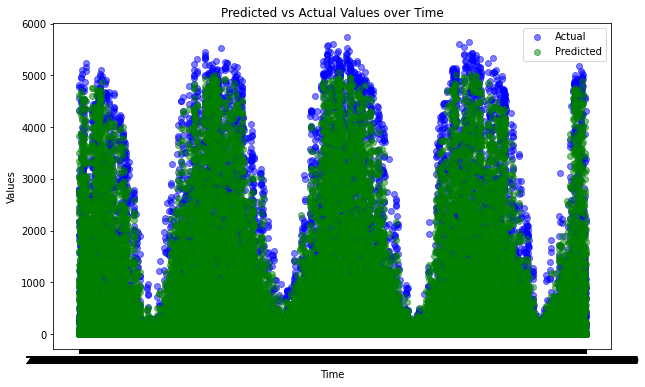

In [ ]:
import matplotlib.pyplot as plt
time_values = y_train_a['time']

# Calculate residuals
residuals = y_train_a['pv_measurement'] - pred_a_whole['pv_measurement']

# Plot actual vs. predicted values over time
plt.figure(figsize=(10, 6))

# Create a scatter plot for actual vs predicted values over time
plt.scatter(time_values, y_train_a['pv_measurement'], alpha=0.5, label='Actual', color='blue')
plt.scatter(time_values, pred_a_whole['pv_measurement'], alpha=0.5, label='Predicted', color='green')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values over Time')
plt.legend()
plt.show()

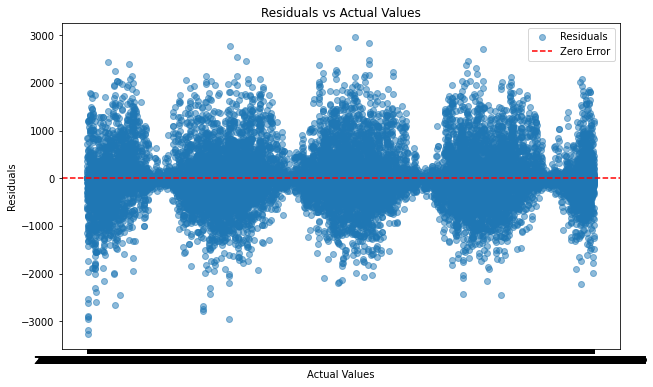

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(time_values, residuals, alpha=0.5, label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error')  # Line for zero residual error
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual Values')
plt.legend()
plt.show()

## **Autogluon 4x columns**
- **What we tried:**
    1. Interpolating ceiling_height
        - Helped: No
    2. Trying different validation sets (random half of estimated, half estimated + half of data in months in test_data)
        - Helped: No
    3. Train the models with different params
        - Helped: yes
        - Optimal: see code
- **Best Kaggle score: (after running for 10 hours)**
    - 142.87

In [ ]:
#!pip install autogluon
#!pip install pandas

In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor
from sklearn.model_selection._split import _BaseKFold
from sklearn.model_selection import train_test_split

import numpy as np
import random

C:\Users\holwe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
seed_value = 42  # Replace with your desired seed value
random.seed(seed_value)
np.random.seed(seed_value)

In [ ]:
x_train_a = pd.read_csv('cleaned_data_quarterly/A/x_train_a.csv')
y_train_a = pd.read_csv('cleaned_data_quarterly/A/train_a.csv')
x_test_a = pd.read_csv('cleaned_data_quarterly/A/x_test_a.csv')

x_train_b = pd.read_csv('cleaned_data_quarterly/B/x_train_b.csv')
y_train_b = pd.read_csv('cleaned_data_quarterly/B/train_b.csv')
x_test_b = pd.read_csv('cleaned_data_quarterly/B/x_test_b.csv')

x_train_c = pd.read_csv('cleaned_data_quarterly/C/x_train_c.csv')
y_train_c = pd.read_csv('cleaned_data_quarterly/C/train_c.csv')
x_test_c = pd.read_csv('cleaned_data_quarterly/C/x_test_c.csv')

train_data_a = x_train_a
test_data_a = x_test_a

train_data_b = x_train_b
test_data_b = x_test_b

train_data_c = x_train_c
test_data_c = x_test_c

### 1. Tried interpolating ceiling_height
- Helped: yes

In [ ]:
# # Create a copy of the slice to avoid SettingWithCopyWarning
# ceiling_height_a = x_train_a_combined[['date_forecast','ceiling_height_agl:m_Q0','ceiling_height_agl:m_Q1','ceiling_height_agl:m_Q2','ceiling_height_agl:m_Q3']].copy()

# # Convert the 'date_forecast' column to datetime using .loc
# ceiling_height_a.loc[:, 'date_forecast'] = pd.to_datetime(ceiling_height_a['date_forecast'])

# # Set the 'date_forecast' as the index
# ceiling_height_a.set_index('date_forecast', inplace=True)

# # Now proceed with your interpolation
# ceiling_height_a_interpolated = ceiling_height_a.interpolate(method='time')

# ceiling_height_a_interpolated.reset_index(inplace=True)
# # And finally, use .loc to update the train_data_a DataFrame
# train_data_a.loc[:, ['ceiling_height_agl:m_Q0','ceiling_height_agl:m_Q1','ceiling_height_agl:m_Q2','ceiling_height_agl:m_Q3']] = ceiling_height_a_interpolated

# # Check for NaN values in the original DataFrame
# train_data_a.isna().sum()

### 2. Tried different validation sets
- Helped: No

In [ ]:
observed_zero = train_data_a[train_data_a['observed'] == 0]
observed_zero['forecast_month'].unique()


array([10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [ ]:
from sklearn.model_selection import train_test_split

def split_dataset(train_data, date_column='forecast_month', observed_column='observed'):
    """
    Splits the dataset into a training set and a validation set.
    The validation set includes approximately 50% of the estimated data, evenly distributed across months.
    Additionally, it includes about half of the observed data for May, June, and July, if present.
    The training set includes all months, excluding the observed data that is included in the validation set.
    
    :param train_data: The original training dataset as a pandas DataFrame.
    :param date_column: The name of the column that contains the month information.
    :param observed_column: The name of the column that indicates if the data is observed.
    :return: A tuple (training_set, validation_set)
    """
    # Work with a copy to avoid modifying the original DataFrame
    train_data = train_data.copy()
    train_data.sort_values(by='date_forecast', inplace=True)
    
    # Separate observed and estimated data
    estimated_data = train_data[train_data[observed_column] == 0]
    observed_data = train_data[train_data[observed_column] != 0]
    
    # Split the estimated data into training and validation sets
    estimated_train, estimated_val = train_test_split(
        estimated_data, test_size=0.5, random_state=42, stratify=estimated_data[date_column]
    )
    
    # Check if there are any observed data for May, June, and July
    if not observed_data[observed_data[date_column].isin([5, 6, 7])].empty:
        print("hellooo")
        observed_may_june_july = observed_data[observed_data[date_column].isin([5, 6, 7])]
        observed_train_mjj, observed_val_mjj = train_test_split(
            observed_may_june_july, test_size=0.5, random_state=42, stratify=observed_may_june_july[date_column]
        )
    else:
        
        observed_train_mjj = pd.DataFrame()
        observed_val_mjj = pd.DataFrame()
    
    # Combine the estimated and observed May, June, July data for the validation set
    validation_set = pd.concat([estimated_val, observed_val_mjj])
    validation_set.sort_values(by='date_forecast', inplace=True)
    
    # The rest of the observed data (excluding May, June, July) will be added to the training set
    observed_rest = observed_data[~observed_data[date_column].isin([5, 6, 7])]
    
    # Combine all training parts for the final training set
    training_set = pd.concat([estimated_train, observed_train_mjj, observed_rest])
    training_set.sort_values(by='date_forecast', inplace=True)
    
    return training_set, validation_set


# Create a copy of the DataFrame to pass to the function
# train_data_copy = train_data_a.copy()
# train_data_a, val_data_a = split_dataset(train_data_copy, 'forecast_month', 'observed')

# print(len(train_data_a))
# print(len(val_data_a))

# train_data_a.drop(columns=['date_forecast'],inplace=True)
# val_data_a.drop(columns=['date_forecast'],inplace=True)

### 3. Tried training the models with different params
- Helped: yes
- Optimal: see code

In [ ]:
predictor_a= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_a, verbosity = 0,presets='best_quality', time_limit= 1500)
predictor_b= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_b, verbosity = 0,presets='best_quality', time_limit= 1500)
predictor_c= TabularPredictor(label ='pv_measurement',eval_metric= 'mean_absolute_error').fit(train_data = train_data_c, verbosity = 0,presets='best_quality', time_limit= 1500)

In [ ]:
predictor_a.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-149.188938,32.432311,1392.113622,0.000996,0.369072,3,True,16
1,ExtraTreesMSE_BAG_L2,-150.163459,27.041173,997.323558,4.195550,40.895635,2,True,12
2,XGBoost_BAG_L2,-151.234774,23.147140,979.282969,0.301517,22.855047,2,True,14
3,WeightedEnsemble_L2,-151.455597,13.237985,646.281267,0.000000,0.313442,2,True,7
4,RandomForestMSE_BAG_L2,-151.651290,27.150475,1068.001251,4.304852,111.573328,2,True,10
5,LightGBMXT_BAG_L1,-151.901258,6.174702,275.184407,6.174702,275.184407,1,True,3
6,CatBoost_BAG_L2,-152.007170,22.951064,1010.092329,0.105441,53.664407,2,True,11
7,NeuralNetFastAI_BAG_L2,-152.266179,23.523954,1162.756133,0.678331,206.328211,2,True,13
8,LightGBM_BAG_L2,-152.392072,23.002668,970.579245,0.157045,14.151322,2,True,9
9,LightGBMXT_BAG_L2,-154.741510,23.079154,976.743476,0.233531,20.315554,2,True,8


In [ ]:
predictor_b.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-39.071064,12.543318,1198.722158,0.000000,0.185030,3,True,17
1,NeuralNetFastAI_BAG_L2,-39.264160,12.366797,1158.965005,0.483112,212.942932,2,True,14
2,WeightedEnsemble_L2,-39.475335,7.664803,445.544492,0.000000,0.159031,2,True,8
3,LightGBMXT_BAG_L1,-39.485701,4.902304,261.029939,4.902304,261.029939,1,True,3
4,LightGBMLarge_BAG_L2,-39.762324,12.060205,985.594195,0.176521,39.572123,2,True,16
5,XGBoost_BAG_L2,-39.806729,12.108225,973.654009,0.224540,27.631937,2,True,15
6,LightGBMXT_BAG_L2,-39.980705,12.072204,965.476062,0.188519,19.453990,2,True,9
7,LightGBM_BAG_L2,-40.080502,11.988696,957.705135,0.105011,11.683063,2,True,10
8,ExtraTreesMSE_BAG_L2,-40.083908,13.835861,963.106674,1.952176,17.084602,2,True,13
9,CatBoost_BAG_L2,-40.102727,11.977684,1036.707535,0.094000,90.685463,2,True,12


In [ ]:
predictor_c.leaderboard(silent=True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-31.162240,14.376106,1354.781825,0.000000,0.199031,3,True,18
1,NeuralNetFastAI_BAG_L2,-31.453003,10.905966,1114.579106,0.382136,161.063999,2,True,14
2,LightGBMXT_BAG_L1,-31.503435,3.853237,241.988032,3.853237,241.988032,1,True,3
3,WeightedEnsemble_L2,-31.503435,3.854236,242.158066,0.000999,0.170033,2,True,8
4,ExtraTreesMSE_BAG_L2,-31.757871,11.837406,963.221879,1.313576,9.706772,2,True,13
5,XGBoost_BAG_L2,-31.917246,10.672405,981.452165,0.148576,27.937057,2,True,15
6,RandomForestMSE_BAG_L2,-31.951825,11.689503,1000.580390,1.165673,47.065283,2,True,11
7,LightGBM_BAG_L2,-32.086834,10.625361,967.236444,0.101531,13.721337,2,True,10
8,LightGBMXT_BAG_L2,-32.373139,10.672569,972.599141,0.148739,19.084034,2,True,9
9,CatBoost_BAG_L2,-32.692435,10.605824,1016.108301,0.081994,62.593193,2,True,12


Write data to files

In [ ]:
# Make predictions for each location
y_pred_a = predictor_a.predict(test_data_a)
y_pred_a=pd.DataFrame(y_pred_a,columns=['pv_measurement']) 

y_pred_b = predictor_b.predict(test_data_b)
y_pred_b=pd.DataFrame(y_pred_b,columns=['pv_measurement'])

y_pred_c = predictor_c.predict(test_data_c)
y_pred_c=pd.DataFrame(y_pred_c,columns=['pv_measurement'])

# Write predictions to file
import os
output_dir = 'autogluon'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
# Save the dataframes into the folder
y_pred_a.to_csv(os.path.join(output_dir, 'y_pred_a.csv'))
y_pred_b.to_csv(os.path.join(output_dir, 'y_pred_b.csv'))
y_pred_c.to_csv(os.path.join(output_dir, 'y_pred_c.csv'))

Combine final prediction

In [ ]:
# Read the CSV files, use 'usecols' to skip 'Unnamed: 0' if it's always the first column
y_pred_a = pd.read_csv('autogluon/y_pred_a.csv', usecols=lambda column: column != 'Unnamed: 0')
y_pred_b = pd.read_csv('autogluon/y_pred_b.csv', usecols=lambda column: column != 'Unnamed: 0')
y_pred_c = pd.read_csv('autogluon/y_pred_c.csv', usecols=lambda column: column != 'Unnamed: 0')

# Concatenate the dataframes
predictions = pd.concat([y_pred_a, y_pred_b, y_pred_c], ignore_index=True)

# Rename the 'pv_measurement' column to 'prediction'
predictions_df = predictions.rename(columns={'pv_measurement': 'prediction'})

# Convert all negative predictions to 0
predictions_df.loc[predictions_df['prediction'] < 0, 'prediction'] = 0

# Add an 'id' column based on the length of the dataframe
predictions_df.insert(0, 'id', range(len(predictions_df)))

# Read the sample_submission CSV
sample_submission = pd.read_csv('sample_submission.csv')

# Ensure that the 'id' column in sample_submission matches the one in predictions_df
sample_submission = sample_submission.merge(predictions_df[['id', 'prediction']], on='id', how='left')

# Save the updated sample_submission to CSV without the index
predictions_df.to_csv('autogluon_prediction_four_columns_remove_consecutive_vals.csv', index=False)



## Catboost

## Pycaret

## Model#

## Model#